<a href="https://colab.research.google.com/github/laneboyer/DijkstrasAlgorithm/blob/master/Implementing_Dijkstras_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Mini-Prog Assignment: Implementing Dijkstra's Algorithm
# Lane Boyer
# 2/23/2019

In this exercise, we will begin to explore the concept of hashing and how it related to various object containers with respect to computational complexity.  We will begin with the base code for as described in Chapter 7 of Grokking Algorithms (Bhargava 2016).  

Example code for the base algorithm is available in the GitHub site for the textbook ( https://github.com/egonSchiele/grokking_algorithms/blob/master/07_dijkstras_algorithm/python/01_dijkstras_algorithm.py (Links to an external site.)Links to an external site. )

The image below shows possible routes to take on a road trip.  RoadTrip_NYC_to_L.A.JPG
The nodes represent city names and vertices are the assumed hours the drive would take.
First, use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm (use the weights assigned to the routes even though breadth-first works on unweighted edges but you should calculate on the side).
Print the route e.g. NYC -> DC -> ATL etc -> L.A.
Then use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes)
Print the route e.g. NYC -> DC -> ATL etc -> L.A.
Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time and stops.
Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.
Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.

Set up a personal computer-based Git repository (or private repository on Github) for your work with algorithms this term.

In [0]:
# Import necessary packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import deque
import time

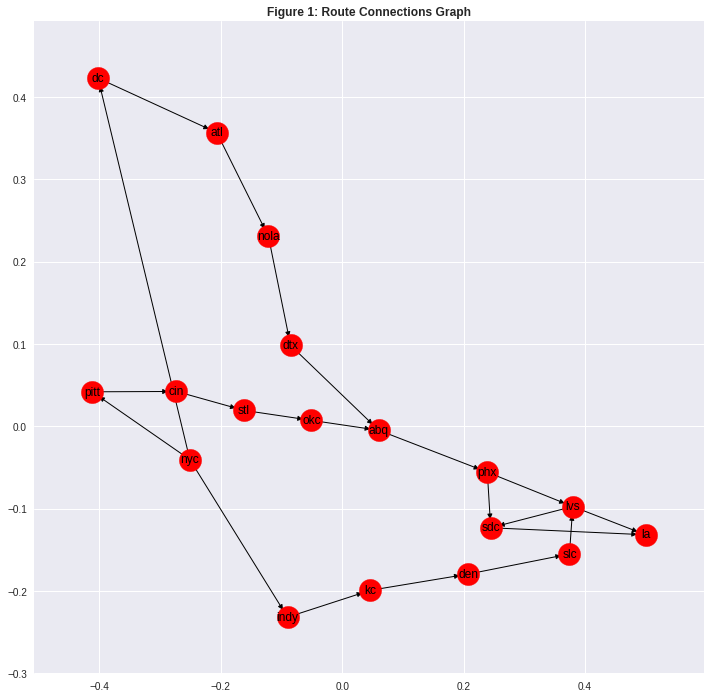

In [74]:
#Building and Plotting the Network Graph

# the graph
graph = {}
graph["nyc"] = {}
graph["nyc"]["dc"] = 2
graph["nyc"]["indy"] = 11
graph["nyc"]["pitt"] = 7

graph["dc"] = {}
graph["dc"]["atl"] = 2

graph["indy"] = {}
graph["indy"]["kc"] = 8

graph["pitt"] = {}
graph["pitt"]["cin"] = 6

graph["atl"] = {}
graph["atl"]["nola"] = 2

graph["kc"] = {}
graph["kc"]["den"] = 7

graph["cin"] = {}
graph["cin"]["stl"] = 8

graph["nola"] = {}
graph["nola"]["dtx"] = 2

graph["den"] = {}
graph["den"]["slc"] = 6

graph["stl"] = {}
graph["stl"]["okc"] = 7

graph["dtx"] = {}
graph["dtx"]["abq"] = 2

graph["slc"] = {}
graph["slc"]["lvs"] = 9

graph["okc"] = {}
graph["okc"]["abq"] = 9

graph["abq"] = {}
graph["abq"]["phx"] = 2

graph["phx"] = {}
graph["phx"]["lvs"] = 2
graph["phx"]["sdc"] = 5

graph["lvs"] = {}
graph["lvs"]["la"] = 5
graph["lvs"]["sdc"] = 2

graph["sdc"] = {}
graph["sdc"]["la"] = 2

graph["la"] = {}


# Build your graph
G = nx.DiGraph(graph)


# Setup the Network Edge Weights
edgeWeights=[]

for city in graph:
   for edge in graph[city]:
    #print(city)
    #print(edge)
    edgeVal = graph[city][edge]
    G[city][edge]['weight'] = edgeVal
    #print(edgeVal)
    edgeWeights.append(edgeVal)
    
pos = nx.layout.spring_layout(G, dim=2, k=None, pos=None, fixed=None,
                              iterations=50, weight='weight', scale=0.5)
 
# Plot it
plt.figure(figsize=(12,12))

plt.title('Figure 1: Route Connections Graph',fontweight='bold')
# nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# edges
nx.draw_networkx_edges(G, pos,
                       width=1 )

# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')


plt.show();

# Breadth-First Algorithm Implementation

la has been found!!
Search Time: 0.7 ms
['nyc', 'indy', 'kc', 'den', 'slc', 'lvs', 'la']
Optimal route to LA will take 18 hours...


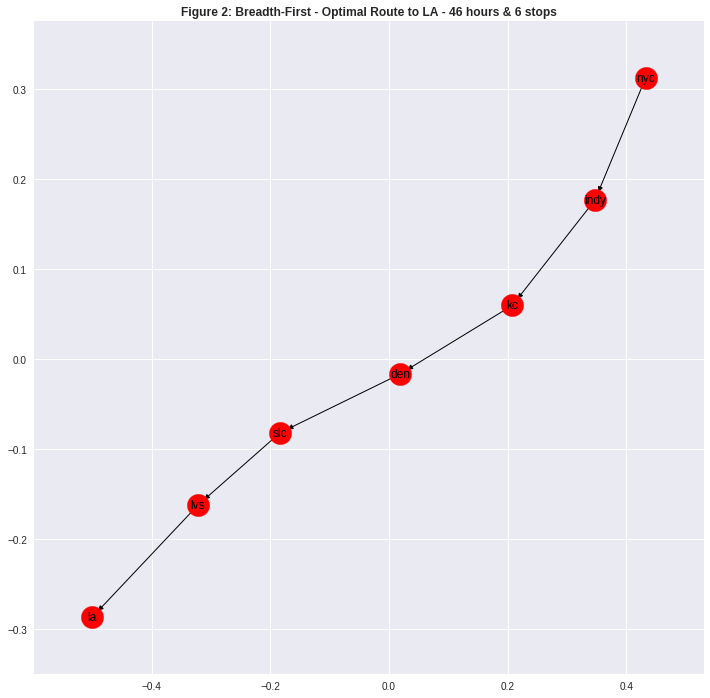

In [148]:
## Implementing the functions for searching the network

# Search Criteria
def criteria(city):
  return city == item

# Breadth-First Search Algorithm
def search(city):
    search_queue = deque()
    search_queue += graph[city]
    # This array is how you keep track of which city's you've searched before.
    searched = []
    while search_queue:
        loc = search_queue.popleft()
        # Only search this location if you haven't already searched them.
        if loc not in searched:
            if criteria(loc):
                print(loc + " has been found!!")
                return True
            else:
                search_queue += graph[loc]
                # Marks this location as searched
                searched.append(loc)
                
    return False
  
#Setting up the items to be searched for...
name_list = ["la"]

searchTimes = []

#Instantiating the for-loop
for item in name_list:
    #start the timer
    start = time.perf_counter()
    
    #perform the search
    search("nyc")
    
    #stop the timer    
    end = time.perf_counter()
        
    # Capturing the search time
    searchtime = round(((end-start)*1000), 2)
    print('Search Time:', searchtime, 'ms')
    searchTimes.append(searchtime)
    
## Labeling the Breadth-First Route
route = []
p = "la"

route.append(p)

idx = 0
while idx <= (len(graph.keys())+1):

  for key in graph.keys():
    if p in list(graph[key].keys()):
      route.append(key)
      p = key
        
     
  idx += 1
  
# Reversing the route from start to finish...
B_route_r = route[::-1]
print(B_route_r)

# Graphing the Optimal Route
i = 0
route_graph = {}

while i < (len(B_route_r)-1):
  strt = B_route_r[i]
  end = B_route_r[i+1]
  
  route_graph[strt] = {}
  route_graph[strt][end] = graph[strt][end]
  
  i += 1
  
# Build your graph
Gr = nx.DiGraph(route_graph)


# Setup the Network Edge Weights
edgeWeights=[]

for city in route_graph:
   for edge in route_graph[city]:
    edgeVal = route_graph[city][edge]
    Gr[city][edge]['weight'] = edgeVal
    edgeWeights.append(edgeVal)

Br_totalHours = sum(edgeWeights)
Br_totalStops = len(edgeWeights)

print("Optimal route to LA will take {} hours..." .format(totalHours))
    
pos1 = nx.layout.spring_layout(Gr, dim=2, k=None, pos=None, fixed=None,
                              iterations=50, weight='weight', scale=0.5)
 
# Plot it
plt.figure(figsize=(12,12))

plt.title('Figure 2: Breadth-First - Optimal Route to LA - {} hours & {} stops'
          .format(Br_totalHours, Br_totalStops),fontweight='bold')
# nodes
nx.draw_networkx_nodes(Gr, pos1, node_size=500)

# edges
nx.draw_networkx_edges(Gr, pos1,
                       width=1 )

# labels
nx.draw_networkx_labels(Gr, pos1, font_size=12, font_family='sans-serif')


plt.show()



# Implementing Dijkstras Algorithm

Search Time: 0.28 ms
Optimal route to LA will take 18 hours...
['nyc', 'dc', 'atl', 'nola', 'dtx', 'abq', 'phx', 'lvs', 'sdc', 'la']


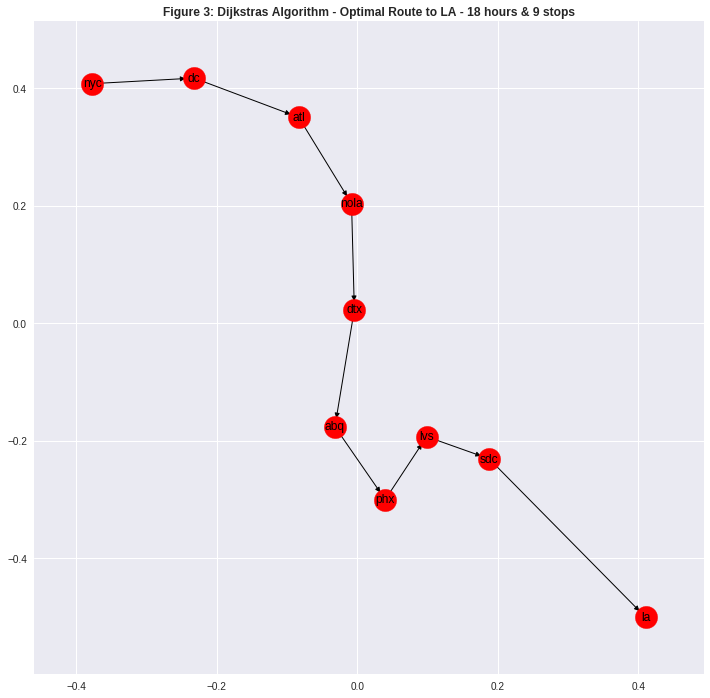

In [170]:
###Implementing Dijkstras Algorithm

# Setup the costs table
infinity = float("inf")
costs = {}
costs["indy"] = 11
costs["dc"] = 2
costs["pitt"] = 7
costs["atl"] = infinity
costs["kc"] = infinity
costs["cin"] = infinity
costs["nola"] = infinity
costs["den"] = infinity
costs["stl"] = infinity
costs["okc"] = infinity
costs["dtx"] = infinity
costs["abq"] = infinity
costs["slc"] = infinity
costs["phx"] = infinity
costs["lvs"] = infinity
costs["sdc"] = infinity
costs["la"] = infinity

# Setup the parents table
parents = {}
parents["dc"] = "nyc"
parents["indy"] = "nyc"
parents["pitt"] = "nyc"
parents["atl"] = None
parents["kc"] = None
parents["cin"] = None
parents["stl"] = None
parents["okc"] = None
parents["abq"] = None
parents["phx"] = None
parents["lvs"] = None
parents["la"] = None
parents["sdc"] = None
parents["slc"] = None
parents["dtx"] = None
parents["nola"] = None
parents["den"] = None

processed = []

def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs[node]
        # If it's the lowest cost so far and hasn't been processed yet...
        if cost < lowest_cost and node not in processed:
            # ... set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

#start the timer
start = time.perf_counter()

# Find the lowest-cost node that you haven't processed yet.
node = find_lowest_cost_node(costs)
# If you've processed all the nodes, this while loop is done.
while node is not None:
    cost = costs[node]
    # Go through all the neighbors of this node.
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        # If it's cheaper to get to this neighbor by going through this node...
        if costs[n] > new_cost:
            # ... update the cost for this node.
            costs[n] = new_cost
            # This node becomes the new parent for this neighbor.
            parents[n] = node
    # Mark the node as processed.
    processed.append(node)
    # Find the next node to process, and loop.
    node = find_lowest_cost_node(costs)

#stop the timer    
end = time.perf_counter()

# Capturing the search time
searchtime = round(((end-start)*1000), 2)
print('Search Time:', searchtime, 'ms')
searchTimes.append(searchtime)

print("Optimal route to LA will take {} hours..." .format(costs["la"]))

## Labeling the Optimal Route
route = []
p = "la"

idx = 0
while idx <= (len(parents)+1):

  for key in parents.keys():
    if key == p:
      route.append(key)
      p = parents[key]
     
  idx += 1

route.append("nyc")

# Reversing the route from start to finish...
route_r = route[::-1]
print(route_r)

# Graphing the Optimal Route
i = 0
route_graph = {}

while i < (len(route_r)-1):
  strt = route_r[i]
  end = route_r[i+1]
  
  route_graph[strt] = {}
  route_graph[strt][end] = graph[strt][end]
  
  i += 1
  
# Build your graph
Gr = nx.DiGraph(route_graph)


# Setup the Network Edge Weights
edgeWeights=[]

for city in route_graph:
   for edge in route_graph[city]:
    edgeVal = route_graph[city][edge]
    Gr[city][edge]['weight'] = edgeVal
    edgeWeights.append(edgeVal)

Dj_totalHours = sum(edgeWeights)
Dj_totalStops = len(edgeWeights)
    
pos1 = nx.layout.spring_layout(Gr, dim=2, k=None, pos=None, fixed=None,
                              iterations=50, weight='weight', scale=0.5)
 
# Plot it
plt.figure(figsize=(12,12))

plt.title('Figure 3: Dijkstras Algorithm - Optimal Route to LA - {} hours & {} stops'
          .format(Dj_totalHours, Dj_totalStops),fontweight='bold')

# nodes
nx.draw_networkx_nodes(Gr, pos1, node_size=500)

# edges
nx.draw_networkx_edges(Gr, pos1,
                       width=1 )

# labels
nx.draw_networkx_labels(Gr, pos1, font_size=12, font_family='sans-serif')

plt.show();

# Plotting the SearchTime Results

In [155]:
results = pd.DataFrame({
    "TravelTime":[Br_totalHours, Dj_totalHours],
    "NumStops":[Br_totalStops, Dj_totalStops],
    "SearchTime":searchTimes,
    "Algorithm":["Breadth-First", "Dijkstras"]
})

results

,Algorithm,NumStops,SearchTime,TravelTime
0,Breadth-First,6,0.70,46
1,Dijkstras,9,0.22,18


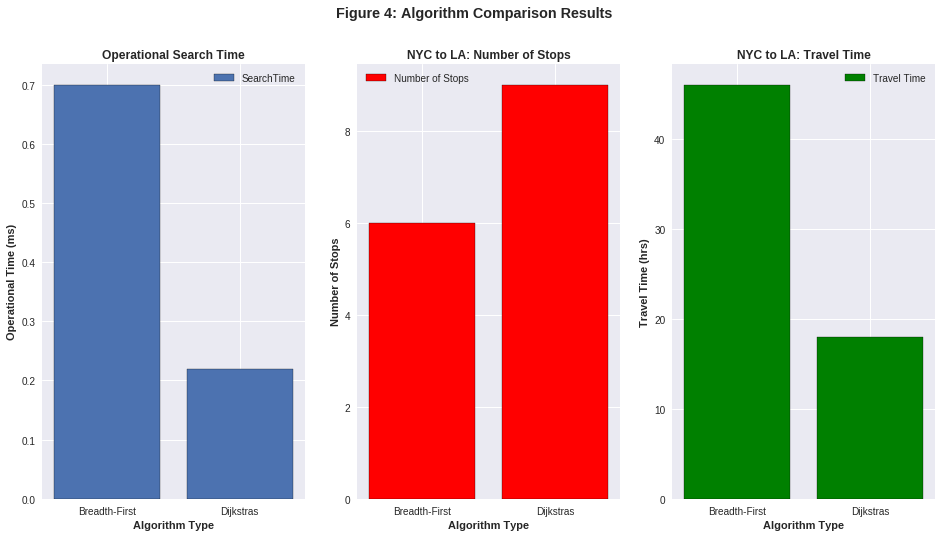

In [168]:
# Plot the results

fig, axs = plt.subplots(1, 3, figsize=(16, 8))

axs[0].bar(results.Algorithm.values,
        results.SearchTime.values,
        edgecolor='black',
        label='SearchTime')

# Add plot features...
axs[0].set_title('Operational Search Time',fontweight='bold')
axs[0].set_xlabel('Algorithm Type', fontweight='bold')
axs[0].set_ylabel('Operational Time (ms)', fontweight='bold')
axs[0].legend()

axs[1].bar(results.Algorithm.values,
        results.NumStops.values,
        edgecolor='black',
        label='Number of Stops', color='r')

# Add plot features...
axs[1].set_title('NYC to LA: Number of Stops',fontweight='bold')
axs[1].set_xlabel('Algorithm Type', fontweight='bold')
axs[1].set_ylabel('Number of Stops', fontweight='bold')
axs[1].legend()


axs[2].bar(results.Algorithm.values,
        results.TravelTime.values,
        edgecolor='black',
        label='Travel Time', color='g')

# Add plot features...
axs[2].set_title('NYC to LA: Travel Time',fontweight='bold')
axs[2].set_xlabel('Algorithm Type', fontweight='bold')
axs[2].set_ylabel('Travel Time (hrs)', fontweight='bold')
axs[2].legend()

fig.suptitle('Figure 4: Algorithm Comparison Results',fontweight='bold')
plt.show()

# Executive Summary

This research compares two methods of route / network optimization on a given network of connected cities.  The scenario on which each algorithm is tested is finding the optimal route through the network to get from New York City to LA.  The full network of route connections is visualized in Figure 1.  "Optimal" in this case means shortest travel time.  The two methods under investigation are the "breadth-first" algorithm and Dijkstra's algorithm.  Both algorithms solve the same sort of problem but do so in different ways and therefore come up with different results (both in terms of the solution as well as operational time taken to find that solution).

The "breadth-first" algorithm operates on a dictionary of connected "nodes" (cities) but does not directly take into account the value of the "edges" (the assigned travel time between two cities)...  This algorithm simply searches for the minimum number of connections that need to be made to reach the given destination (LA).  The optimal route found by the "breadth-first" algorithm is shown in Figure 2.  Note that this route has only 6 stops BUT when we take into account the travel time between cities this route would take 46 hours to complete.  This algorithm is somewhat sluggish as it takes O(V+E) time to complete... (V = number of nodes, E = number of edges).  In this scenario the "breadth-first" algorithm took approx 0.70 ms to complete.

Dijkstra's algorithm operates on the same type of dictionary as the "bread-first" algorithm but this algorithm DOES take into account the weights of the edges (the travel times between cities) during its optimization iterations.  Dijkstra's algorithm searches for the minimum "cost" of each of the paths through the network.  In this case the "cost" is the travel time between cities (or edge weights).  The optimal route found by Dijkstra's algorithm is illustrated in Figure 3.  This solution is clearly different than the solution in Figure 2... it has different cities as well as additional stops (9-stops in total) BUT the total travel time of this route is only 18 hours.  This algorithm has found a much faster route to get through the network given the costs associated with each route connection.  Dijkstra's algorithm is also more efficient than the "breadth-first" approach, it only took approx 0.22 ms to find this solution.  Dijkstra's algorithm's speed, when represented in big O notation is O(ElogV).  Dijkstra's is much faster due to the fact that (ElogV) << (E + V)...

The algorithm's performance comparison is summarized in Figure 4 "Algorithm Comparison Results".  We can plainly see the trade-off's in the solution and operational performance between the "breadth-first" algorithm and Dijkstra's algorithm.  Depending on the type of "optimization" you want to complete and if your network is "weighted" (has values or costs associated with the edges) or not, you will have to decide which type of algorithm is best suited for your needs.  Basically, if your network is weighted and you care about the values connecting each node, you should use Dijkstra's.  If your network is un-weighted, or if you just care about the "number of connections" as opposed to the "cost" of the connections, then you should deploy the "breadth-first" algorithm.